# ASSIGNMENT 3 - CLASSIFICATION
* Nadia Syachrani
* PYTN-KS11-020
* Batch 4 - Python for Data Science

## IMPORT LIBRARY

In [1]:
# Importing all required packages
import pandas as pd
import numpy as np

# Data viz lib
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

## PREPROCESSING

### Load Dataset
Abstract: The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Output variable (desired target):
* 21 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [2]:
# read the data
df = pd.read_csv('bank-full.csv',sep = ';', quotechar='"', header=0)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
# Checking the details of the column starting from the amount, data type and null data
print("General Information about the Data")
df.info()

General Information about the Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
# Checking the Number of Rows and Columns
print("Shape of the data:",df.shape)

Shape of the data: (45211, 17)


In [5]:
# Checking Column Names
print("Columns Names are:\n",df.columns)

Columns Names are:
 Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


### Checking for null values

In [6]:
# Checking null values
print("Is there any null values in the data ? \n",df.isnull().values.any())

Is there any null values in the data ? 
 False


In [7]:
# Checking total null values
print("Total Null Values in the data")
df.isnull().sum()

Total Null Values in the data


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Unique Values for each Column

In [8]:
# Displays the Unique Type and Number of Category Features on a DataFrame
category_features = df.select_dtypes(include=['object', 'bool']).columns.values

for col in category_features:
    print(col, "(", len(df[col].unique()) , "values):\n", np.sort(df[col].unique()),'\n')

job ( 12 values):
 ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown'] 

marital ( 3 values):
 ['divorced' 'married' 'single'] 

education ( 4 values):
 ['primary' 'secondary' 'tertiary' 'unknown'] 

default ( 2 values):
 ['no' 'yes'] 

housing ( 2 values):
 ['no' 'yes'] 

loan ( 2 values):
 ['no' 'yes'] 

contact ( 3 values):
 ['cellular' 'telephone' 'unknown'] 

month ( 12 values):
 ['apr' 'aug' 'dec' 'feb' 'jan' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep'] 

poutcome ( 4 values):
 ['failure' 'other' 'success' 'unknown'] 

y ( 2 values):
 ['no' 'yes'] 



In [9]:
# Displays the Frequency of Values in Each Feature Category and Number of Uniques in Each DataFrame Row
for col in category_features:
    print(col)
    print(df[col].value_counts(), "\n")
    print("======================" * 3, "\n")
    
print(df.nunique(axis=1))

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64 


marital
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64 


education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64 


default
no     44396
yes      815
Name: default, dtype: int64 


housing
yes    25130
no     20081
Name: housing, dtype: int64 


loan
no     37967
yes     7244
Name: loan, dtype: int64 


contact
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64 


month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64 


poutcome
unknown 

### Numeric or Categorical Data

In [10]:
# Statistical description of numeric dataset attributes
print('Discrption of Numeric Data : ')
df.describe().astype(np.int64)

Discrption of Numeric Data : 


,age,balance,day,duration,campaign,pdays,previous
count,45211,45211,45211,45211,45211,45211,45211
mean,40,1362,15,258,2,40,0
std,10,3044,8,257,3,100,2
min,18,-8019,1,0,1,-1,0
25%,33,72,8,103,1,-1,0
50%,39,448,16,180,2,-1,0
75%,48,1428,21,319,3,-1,0
max,95,102127,31,4918,63,871,275


In [11]:
# dataset of numeric data
numeric_data = df.select_dtypes(include = np.number)
numeric_data

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [12]:
# column names of numeric data
numeric_data.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [13]:
print('Discrption of Categorical Data : ')
df.describe(include='object')

Discrption of Categorical Data : 


,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [14]:
# dataset of category data
categorical_data = df.select_dtypes(exclude = np.number)
categorical_data

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


In [15]:
# column names of category data
categorical_data.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

### Check for Class Imbalance

Target values counts:
 no     39922
yes     5289
Name: y, dtype: int64


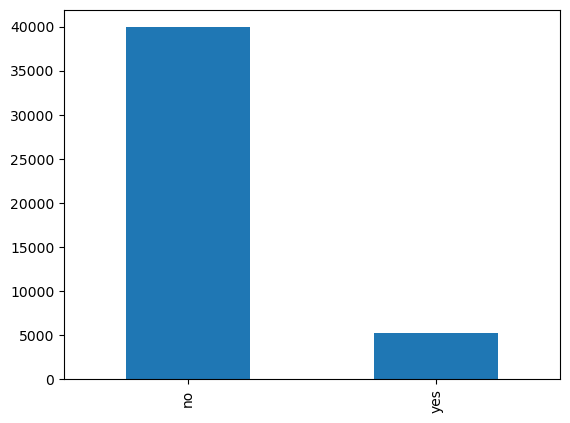

In [16]:
print("Target values counts:\n",df['y'].value_counts())
df['y'].value_counts().plot.bar()
plt.show()

**Analysis :**
* subsciption of term deposit total no sebanyak 39.922, lebih banyak dibanding yang yes

In [17]:
# Calculates the Percentage of Class Proportion to a Target Feature
class_values = (df['y'].value_counts()/df['y'].value_counts().sum())*100
class_values

no     88.30152
yes    11.69848
Name: y, dtype: float64

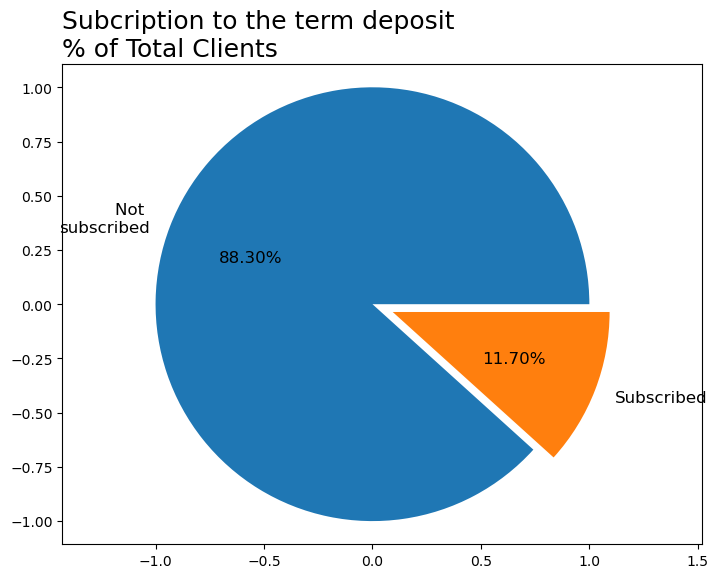

In [18]:
# Pie chart
labels = ["Not \nsubscribed", "Subscribed"]
explode = (0, 0.1)  # only "explode" the second slice (i.e. 'Subscribed')

# depicting the visualization 
fig = plt.figure() 
ax = fig.add_axes([0,0,1,1]) 

ax.pie(df['y'].value_counts(), 
       labels = labels,
       explode = explode,
       autopct ='%1.2f%%',
       frame = True,
       textprops = dict(color ="black", size=12)) 

ax.axis('equal') 
plt.title('Subcription to the term deposit\n% of Total Clients',
     loc='left',
     color = 'black', 
     fontsize = '18')

plt.show()

**Analysis :**

kedua kategori tersebut tidak seimbang, dimana nilai positif yaitu kategori yes/subscribed hanya sebesar 12,66% dari semua target

## DATA VISUALIZATION

### Category Data Distribution

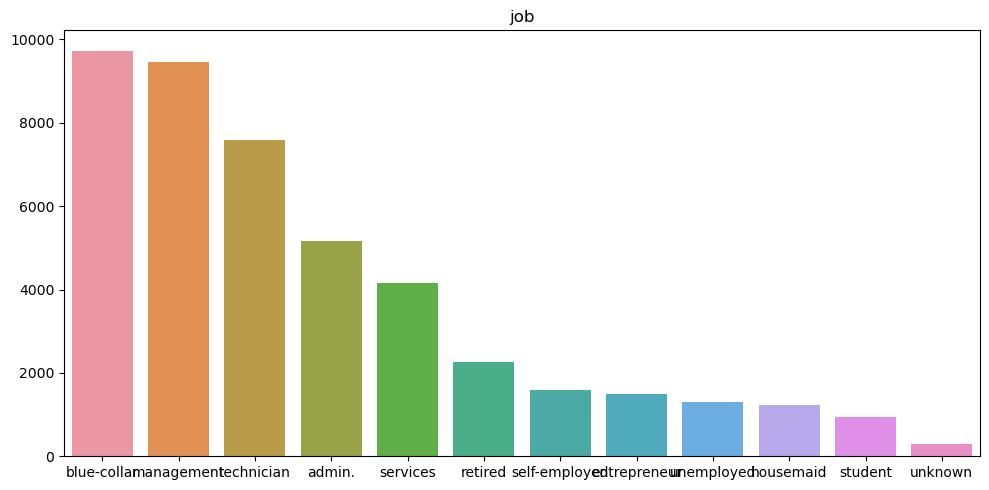

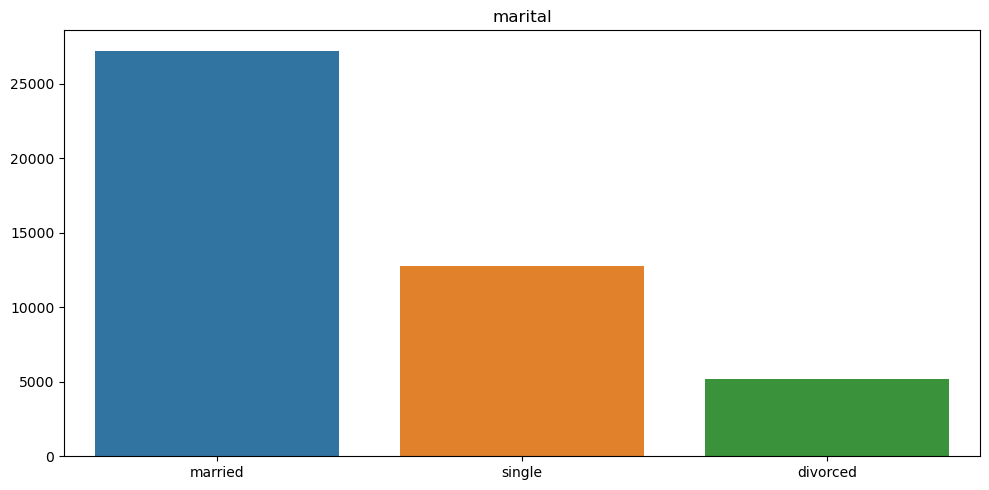

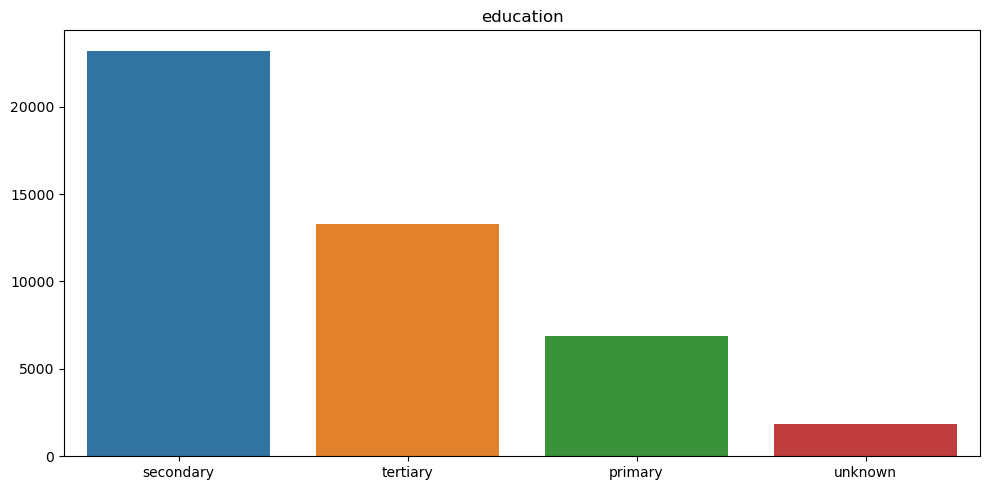

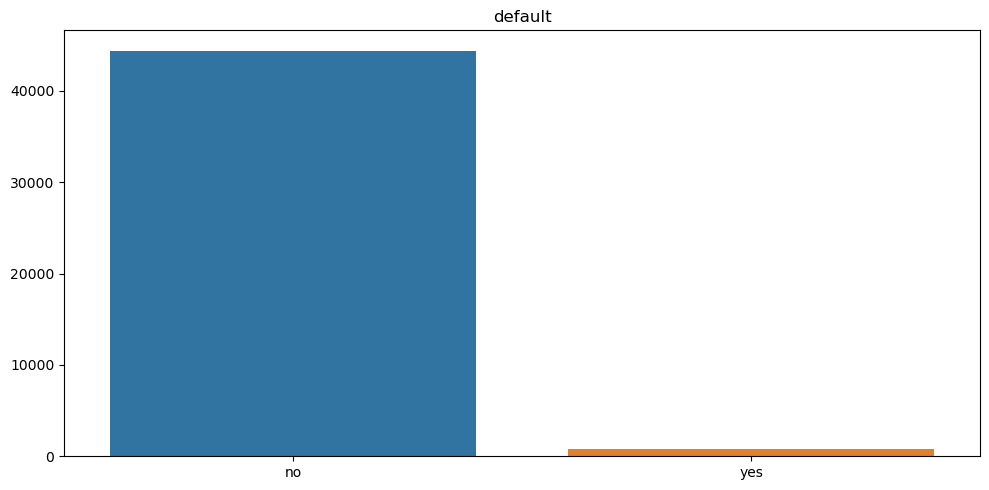

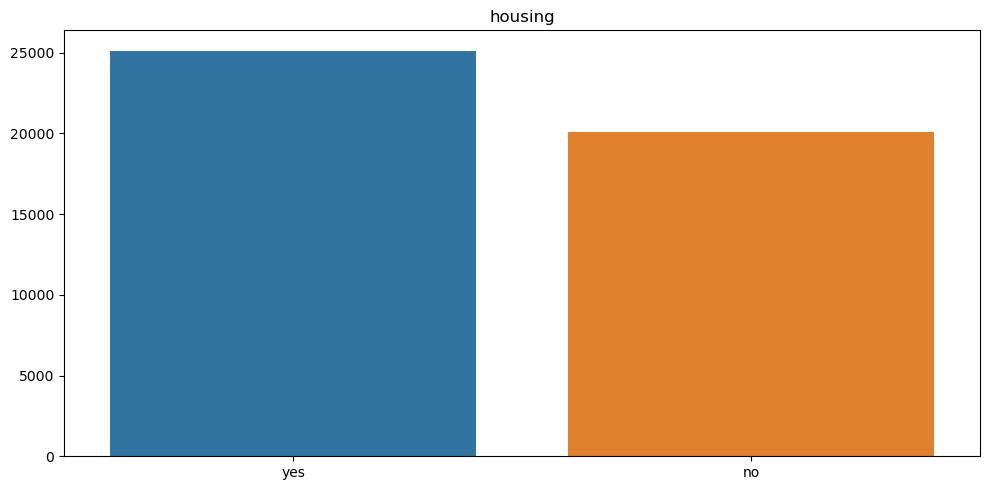

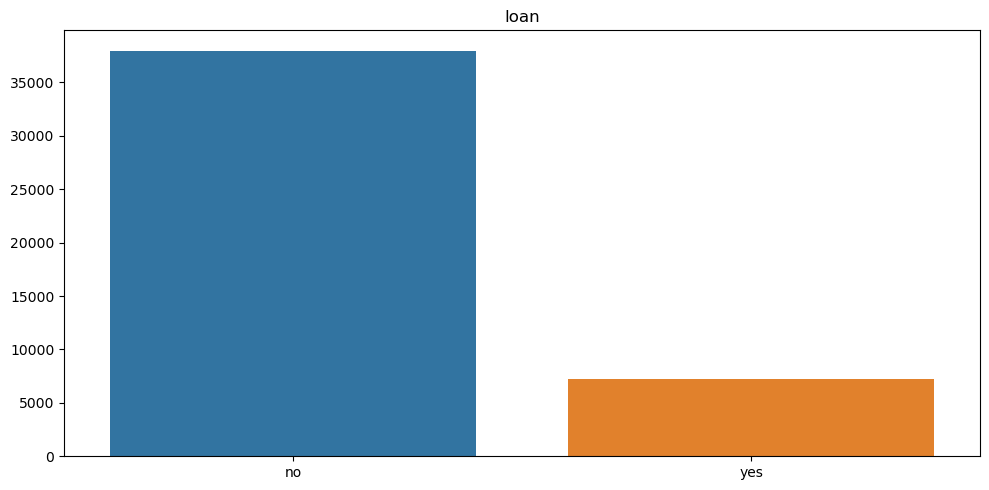

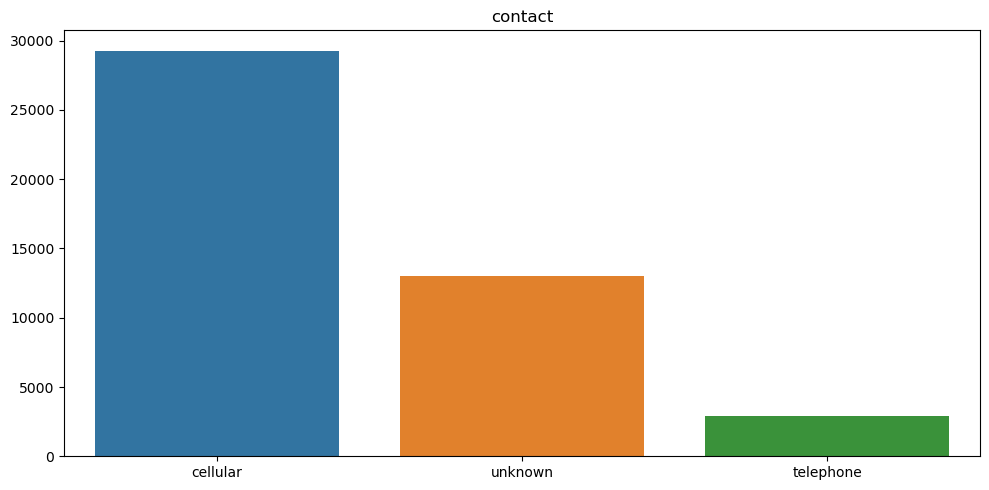

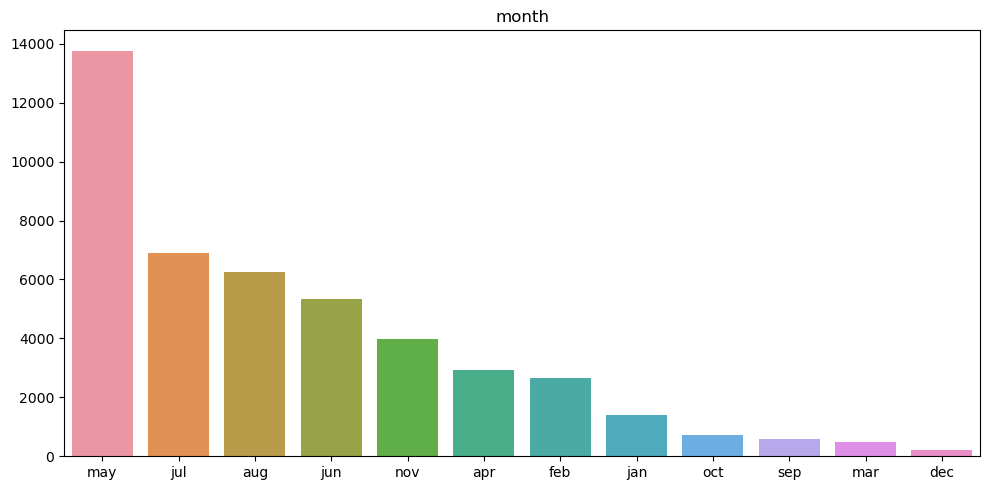

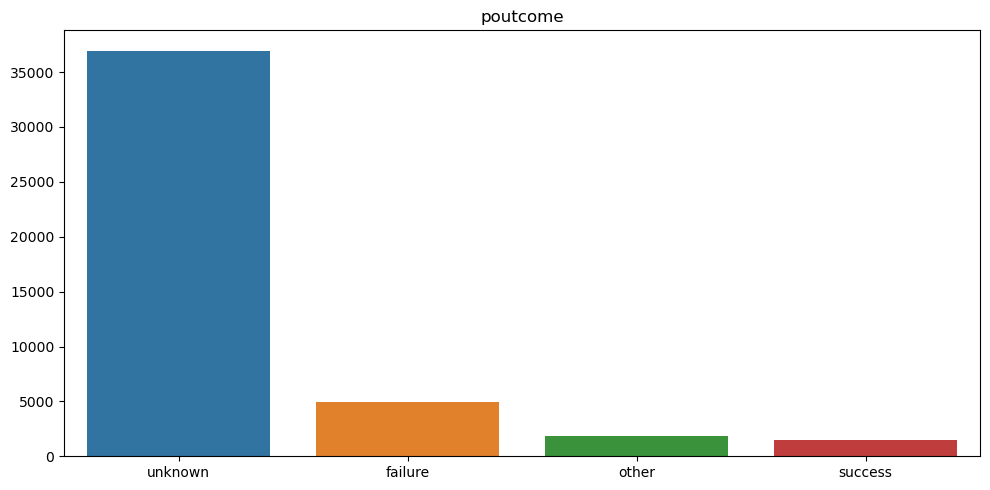

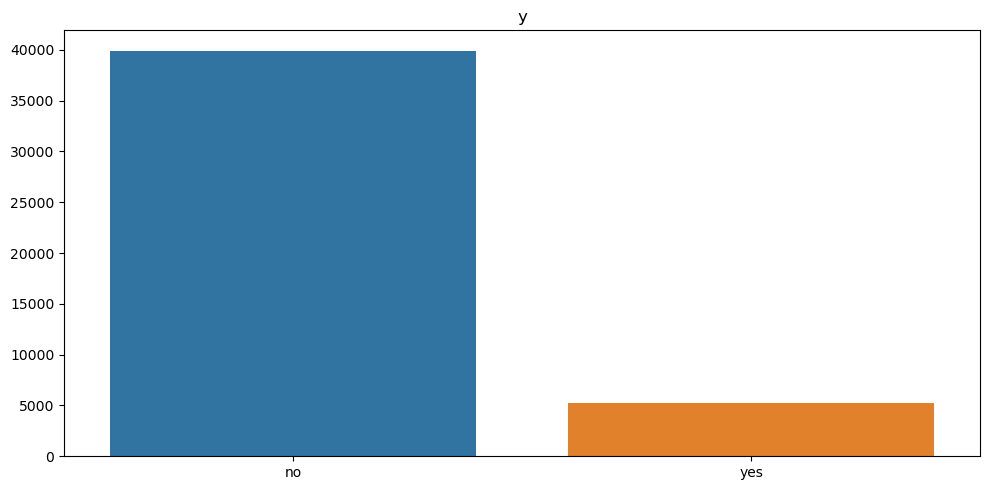

In [19]:
# Displays Barplot Graphs for Each Category
cols = categorical_data.columns
for column in cols:
    plt.figure(figsize=(10,5))
    sns.barplot(df[column].value_counts().index, df[column].value_counts().values, data=df)    
    plt.title(column)    
    plt.tight_layout()

**Analysis :**
1. Job: Dari data tersebut 3 Job teratas adalah blue-collars, management, and technicians.
2. Marital status: Kebanyakan dari mereka sudah menikah
3. Education: Sebagian besar klien memiliki tingkat pendidikan kedua
4. default/credit: kebanyakan klien tidak memiliki masa default pada file kredit mereka
5. housing: paling banyak memiliki rumah
6. loan: paling banyak tidak memiliki pinjaman pribadi
7. contact: Sarana komunikasi yang umum adalah seluler.
8. month: Mei adalah bulan yang sibuk dan Desember adalah bulan yang paling tidak sibuk

### Numeric Data Distribution

Histogram for the numerical features :



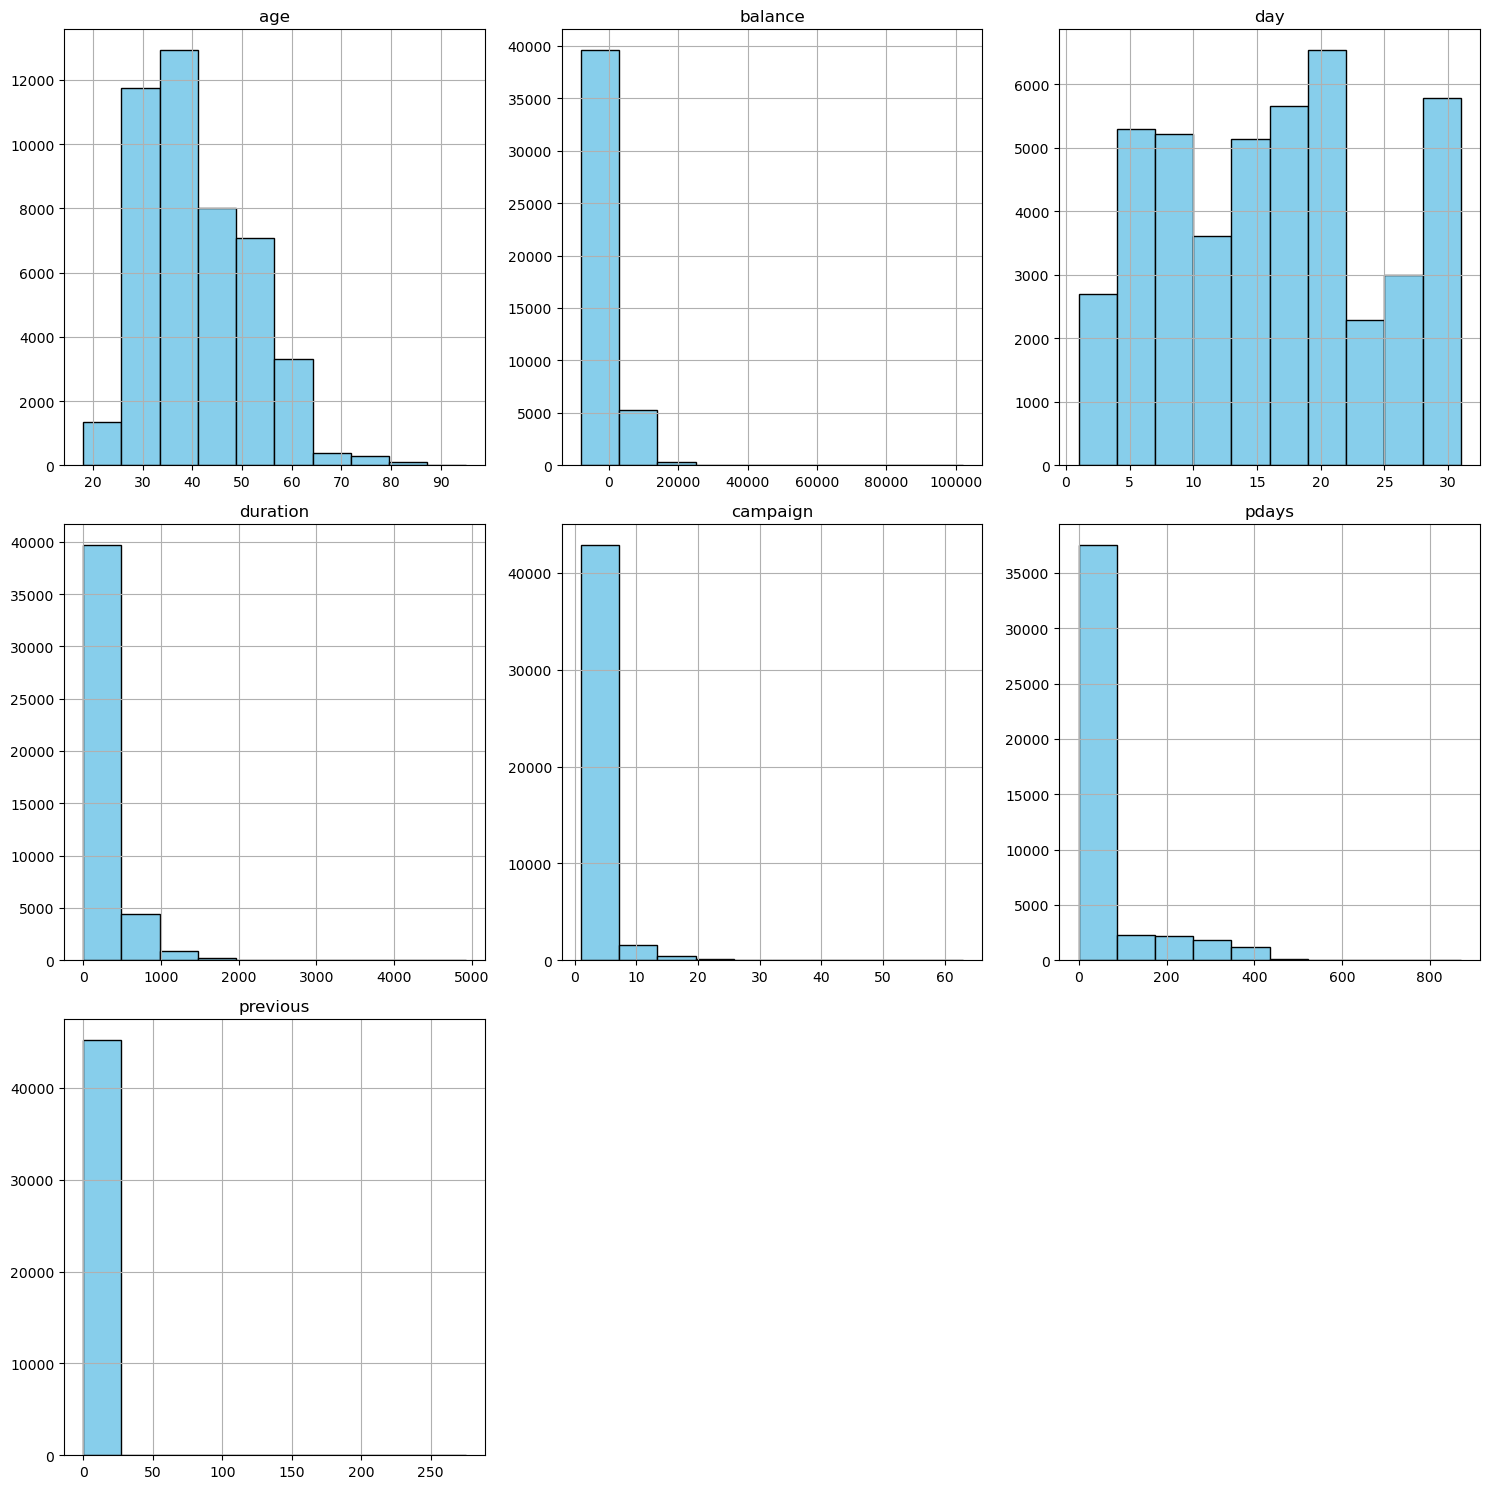

In [20]:
# Displays Barplot Graphs for Each Numeric
print("Histogram for the numerical features :\n")
df.hist(figsize=(15,15),edgecolor='k',color='skyblue')
plt.tight_layout()
plt.show()

**Analysis :**
1. Age: umur klien yang paling banyak ada disekitar 35-40 tahun
2. Balance: kebanyakan diantara -500-12000
3. Day: paling banyak diantara pada hari 19-22
4. Duration: kebanyakan diantara 0-500
5. Campaign: paling banyak diantara 0-8
6. Loan: paling banyak diantara 0-100
7. Previous: kebanyakan 0-25

### Visualize Feature Correlations

In [21]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


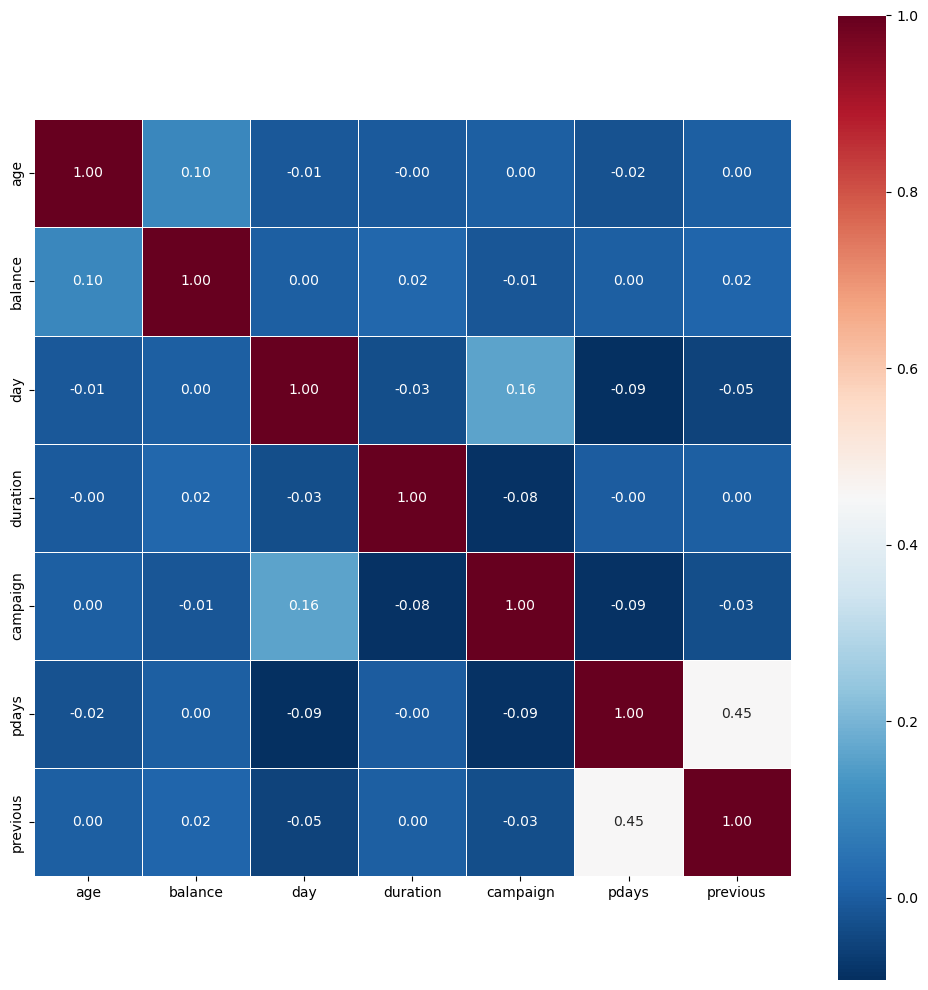

In [22]:
# create heatmpas
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(df._get_numeric_data().astype(float).corr(),
            square=True, cmap='RdBu_r', linewidths=.5,
            annot=True, fmt='.2f').figure.tight_layout()
plt.show()

**Analysis :**
* Nilai korelasi antara dua variabel yang sama adalah 1 atau sempurna. Ini karena diagonal heatmap menunjukkan korelasi antara variabel dengan dirinya sendiri, dan korelasi antara variabel yang sama selalu 1. 
* Ini merupakan indikasi bahwa ada hubungan yang sangat kuat atau persamaan antara kedua variabel tersebut

### Label Encoder

In [23]:
df = pd.get_dummies(df,columns = ['job','marital','education','default',
                                   'housing','loan','month',
                                   'day','poutcome'], drop_first = True)

In [24]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
bank = df.apply(le.fit_transform)
bank

,age,balance,contact,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,day_25,day_26,day_27,day_28,day_29,day_30,day_31,poutcome_other,poutcome_success,poutcome_unknown
0,40,3036,2,261,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,26,945,2,151,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15,918,2,76,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,29,2420,2,92,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,15,917,2,198,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,1741,0,975,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
45207,53,2639,0,456,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
45208,54,5455,0,1116,4,181,3,1,0,0,...,0,0,0,0,0,0,0,0,1,0
45209,39,1584,1,508,3,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


### Creating X and Y Variable

In [25]:
X = bank.loc[:,df.columns != 'y']
X

,age,balance,contact,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,day_25,day_26,day_27,day_28,day_29,day_30,day_31,poutcome_other,poutcome_success,poutcome_unknown
0,40,3036,2,261,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,26,945,2,151,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15,918,2,76,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,29,2420,2,92,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,15,917,2,198,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,1741,0,975,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
45207,53,2639,0,456,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
45208,54,5455,0,1116,4,181,3,0,0,0,...,0,0,0,0,0,0,0,0,1,0
45209,39,1584,1,508,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [26]:
y = bank.loc[:,df.columns == 'y']
y

,y
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


### Splitting Dataset in Training and Test

In [27]:
# Split dataset into training set [70%] and test set [30%]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [28]:
# print lenght of both test and train set
print('shape of X_train : ',len(X_train), '\nshape of y_train : ',len(y_train))
print('\nshape of X_test  : ',len(X_test), '\nshape of y_test  : ',len(y_test))

shape of X_train :  31647 
shape of y_train :  31647

shape of X_test  :  13564 
shape of y_test  :  13564


In [29]:
X_test

,age,balance,contact,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,day_25,day_26,day_27,day_28,day_29,day_30,day_31,poutcome_other,poutcome_success,poutcome_unknown
14001,19,2319,0,91,14,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
32046,18,663,0,1064,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13318,29,516,1,243,4,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
42991,39,1417,0,105,6,185,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
14237,15,516,0,332,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,13,916,2,164,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
35730,30,5181,1,139,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
11495,21,920,2,185,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
20975,24,6795,0,149,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
X_train

,age,balance,contact,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,day_25,day_26,day_27,day_28,day_29,day_30,day_31,poutcome_other,poutcome_success,poutcome_unknown
24951,40,1937,2,205,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
22129,37,1112,0,168,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
986,32,1075,2,216,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14999,25,2784,0,63,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4027,35,1563,2,512,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30403,17,1911,0,39,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
21243,17,1666,0,233,11,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
42613,17,1239,0,261,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
43567,52,1532,0,149,1,179,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [31]:
y_test

,y
14001,0
32046,1
13318,0
42991,0
14237,0
...,...
2666,0
35730,0
11495,0
20975,0


In [32]:
y_train

,y
24951,0
22129,0
986,0
14999,0
4027,0
...,...
30403,0
21243,0
42613,1
43567,0


### Standard Scaler

In [33]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [34]:
X_train

array([[ 1.61533375, -0.02102485,  1.51726654, ..., -0.20580809,
        -0.18515746,  0.47245559],
       [ 1.33183358, -0.58269031, -0.71234593, ..., -0.20580809,
        -0.18515746,  0.47245559],
       [ 0.8593333 , -0.60788016,  1.51726654, ..., -0.20580809,
        -0.18515746,  0.47245559],
       ...,
       [-0.55816755, -0.49622787, -0.71234593, ..., -0.20580809,
        -0.18515746,  0.47245559],
       [ 2.74933443, -0.29675153, -0.71234593, ..., -0.20580809,
        -0.18515746, -2.11660105],
       [ 0.48133307, -0.67732243,  1.51726654, ..., -0.20580809,
        -0.18515746,  0.47245559]])

In [35]:
X_test

,age,balance,contact,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,day_25,day_26,day_27,day_28,day_29,day_30,day_31,poutcome_other,poutcome_success,poutcome_unknown
14001,19,2319,0,91,14,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
32046,18,663,0,1064,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13318,29,516,1,243,4,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
42991,39,1417,0,105,6,185,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
14237,15,516,0,332,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,13,916,2,164,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
35730,30,5181,1,139,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
11495,21,920,2,185,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
20975,24,6795,0,149,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# ALGORITHM MACHONE LEARNING

## LOGISTIC REGRESSION

In [36]:
X

,age,balance,contact,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,day_25,day_26,day_27,day_28,day_29,day_30,day_31,poutcome_other,poutcome_success,poutcome_unknown
0,40,3036,2,261,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,26,945,2,151,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15,918,2,76,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,29,2420,2,92,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,15,917,2,198,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,1741,0,975,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
45207,53,2639,0,456,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
45208,54,5455,0,1116,4,181,3,0,0,0,...,0,0,0,0,0,0,0,0,1,0
45209,39,1584,1,508,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [37]:
y

,y
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


In [38]:
# Split dataset into training set [70%] and test set [30%]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [39]:
lr = LogisticRegression()
#Train the model using the training sets
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.8941763832274782

In [40]:
#Predict the response for train dataset
y_pred_train = lr.predict(X_train)
print('y pred train :', y_pred_train)

y pred train : [0 0 0 ... 0 0 0]


In [41]:
#Predict the response for test dataset
y_pred_test = lr.predict(X_test)
print('y pred test :', y_pred_test)

y pred test : [0 1 0 ... 0 0 0]


### Confussion Matrix

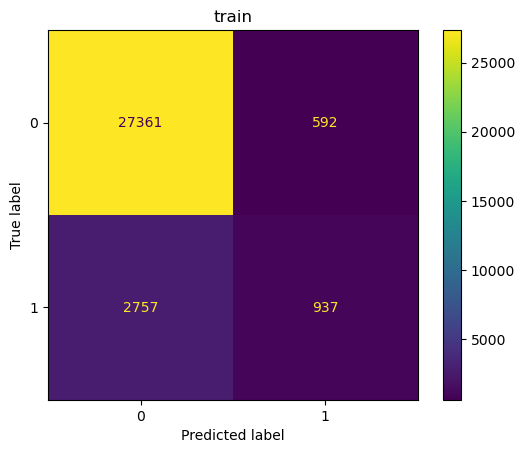

In [42]:
#Pconfusion matrix for train dataset
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('train')
plt.show()

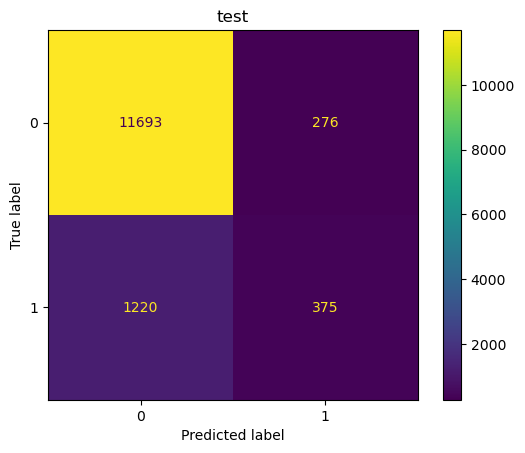

In [43]:
#Pconfusion matrix for test dataset
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('test')
plt.show()

In [44]:
# Cetak confusion matrix
print('Confusion Matrix train set:\n', confusion_matrix(y_train, y_pred_train))
print('Confusion Matrix test set:\n', confusion_matrix(y_test, y_pred_test))

Confusion Matrix train set:
 [[27361   592]
 [ 2757   937]]
Confusion Matrix test set:
 [[11693   276]
 [ 1220   375]]


**Analysis :**
* Model Logistic Regression menghasilkan akurasi yang lebih rendah pada data testing dibandingkan dengan data training. 
* Pada data training, model menghasilkan 27361 True Negative (TN), 592 False Positive (FP), 2757 False Negative (FN), dan 937 True Positive (TP)
* Sementara pada data testing, model menghasilkan 11693 TN, 276 FP, 1220 FN, dan 375 TP.

### Accuracy Score

In [45]:
# Cetak Acuracy score
as_lr_train = metrics.accuracy_score(y_train,y_pred_train)
as_lr_test = metrics.accuracy_score(y_test,y_pred_test)
print('train set Accuracy: {0:.4f}'.format(as_lr_train))
print('test set Accuracy: {0:.4f}'.format(as_lr_test))

train set Accuracy: 0.8942
test set Accuracy: 0.8897


**Analysis :**
* Berdasarkan hasil yang diperoleh, nilai akurasi data training lebih besar daripada data testing. 
* Nilai akurasi sebesar 0.8942 pada data train dan 0.8897 pada data test pada model logistic regression. 
* Hal ini menunjukkan bahwa model tersebut mampu melakukan klasifikasi dengan akurasi yang cukup baik pada data train dan test.

### Classification Report

In [46]:
# cetak classification report
print('Train Set')
print(classification_report(y_train,y_pred_train))
print('Test Set')
print(classification_report(y_test,y_pred_test))

Train Set
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     27953
           1       0.61      0.25      0.36      3694

    accuracy                           0.89     31647
   macro avg       0.76      0.62      0.65     31647
weighted avg       0.87      0.89      0.87     31647

Test Set
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11969
           1       0.58      0.24      0.33      1595

    accuracy                           0.89     13564
   macro avg       0.74      0.61      0.64     13564
weighted avg       0.87      0.89      0.87     13564



**Analysis :**
* Model LR memiliki performa yang cukup baik pada data train dan test, namun masih terdapat ruang untuk perbaikan.
* Pada data train, dapat dilihat bahwa model LR memiliki precision sebesar 0.91 dan recall sebesar 0.98 untuk kelas 0, sedangkan untuk kelas 1 memiliki precision sebesar 0.61 dan recall sebesar 0.25. Hal ini menunjukkan bahwa model LR mampu mengklasifikasikan sebagian besar data kelas 0 dengan benar, namun memiliki kesulitan dalam mengklasifikasikan data kelas 1. F1-score pada kelas 1 juga menunjukkan nilai yang relatif rendah, yaitu sebesar 0.36.
* Sedangkan pada data test, meskipun nilai precision dan recall untuk kelas 0 masih cukup baik, namun nilai precision dan recall untuk kelas 1 relatif rendah, yaitu sebesar 0.58 dan 0.24. Hal ini menunjukkan bahwa model LR juga masih kesulitan dalam mengklasifikasikan data kelas 1 pada data test. F1-score pada kelas 1 juga menunjukkan nilai yang relatif rendah, yaitu sebesar 0.33.
* Hasil evaluasi kinerja model logistic regression pada data train dan test menunjukkan bahwa model memiliki akurasi yang tinggi, tetapi terdapat perbedaan yang signifikan pada precision, recall, dan f1-score antara kelas mayoritas (0) dan kelas minoritas (1).
* Pada data test, terjadi overfitting pada kelas minoritas (1), yang menandakan kurangnya kemampuan model dalam melakukan generalisasi pada data yang belum pernah dilihat sebelumnya. 

## NAIVE BAYES

In [47]:
X

,age,balance,contact,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,day_25,day_26,day_27,day_28,day_29,day_30,day_31,poutcome_other,poutcome_success,poutcome_unknown
0,40,3036,2,261,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,26,945,2,151,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15,918,2,76,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,29,2420,2,92,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,15,917,2,198,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,1741,0,975,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
45207,53,2639,0,456,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
45208,54,5455,0,1116,4,181,3,0,0,0,...,0,0,0,0,0,0,0,0,1,0
45209,39,1584,1,508,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [48]:
y

,y
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


In [49]:
# Split dataset into training set [70%] and test set [30%]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [50]:
#Train the model using the training sets
modelNB = GaussianNB()
modelNB.fit(X_train,y_train)

#Predict the response for train dataset
y_pred_train_nb = modelNB.predict(X_train)
y_pred_train_nb

array([0, 0, 0, ..., 0, 1, 0])

In [51]:
#Train the model using the training sets
modelNB.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_test_nb = modelNB.predict(X_test)
y_pred_test_nb

array([0, 0, 0, ..., 0, 0, 0])

### Confussion Matrix

In [52]:
# Cetak confusion matrix
print('Confusion Matrix test set:\n', confusion_matrix(y_test, y_pred_test_nb))
print('Confusion Matrix train set:\n', confusion_matrix(y_train, y_pred_train_nb))

Confusion Matrix test set:
 [[10480  1489]
 [  724   871]]
Confusion Matrix train set:
 [[24535  3418]
 [ 1694  2000]]


**Analysis :**
* Model Naive Bayes menghasilkan akurasi yang lebih rendah pada data testing dibandingkan dengan data training. 
* Pada data testing, model menghasilkan 10480 True Negative (TN), 1489 False Positive (FP), 724 False Negative (FN), dan 871 True Positive (TP)
* Sementara pada data training, model menghasilkan 24535 TN, 3418 FP, 1694 FN, dan 2000 TP.

### Accuracy Score

In [53]:
# Cetak accuracy score
as_nb_train = metrics.accuracy_score(y_train,y_pred_train_nb)
as_nb_test = metrics.accuracy_score(y_test,y_pred_test_nb)
print('train set Accuracy: {0:.4f}'.format(as_nb_train))
print('test set Accuracy: {0:.4f}'.format(as_nb_test))

train set Accuracy: 0.8385
test set Accuracy: 0.8368


**Analysis :**
* Berdasarkan hasil yang diperoleh, nilai akurasi data training lebih besar daripada data testing. 
* Nilai akurasi sebesar 0.8385 pada data train dan 0.8368 pada data test pada model NB.
* Hal ini menunjukkan bahwa model tersebut mampu melakukan klasifikasi dengan akurasi yang cukup baik pada data train dan test.

### Classification Report

In [54]:
# Cetak classification report
print('train set \n classification report',classification_report(y_train,y_pred_train_nb))
print('test set \n classification report',classification_report(y_test,y_pred_test_nb))

train set 
 classification report               precision    recall  f1-score   support

           0       0.94      0.88      0.91     27953
           1       0.37      0.54      0.44      3694

    accuracy                           0.84     31647
   macro avg       0.65      0.71      0.67     31647
weighted avg       0.87      0.84      0.85     31647

test set 
 classification report               precision    recall  f1-score   support

           0       0.94      0.88      0.90     11969
           1       0.37      0.55      0.44      1595

    accuracy                           0.84     13564
   macro avg       0.65      0.71      0.67     13564
weighted avg       0.87      0.84      0.85     13564



**Analysis :**
* Model NB memiliki performa yang cukup baik pada data train dan test, namun masih terdapat ruang untuk perbaikan.
* Pada data train, dapat dilihat bahwa model NB memiliki precision sebesar 0.94 dan recall sebesar 0.88 untuk kelas 0, sedangkan untuk kelas 1 memiliki precision sebesar 0.37 dan recall sebesar 0.54. Hal ini menunjukkan bahwa model NB mampu mengklasifikasikan sebagian besar data kelas 0 dengan benar, namun memiliki kesulitan dalam mengklasifikasikan data kelas 1. F1-score pada kelas 1 juga menunjukkan nilai yang relatif rendah, yaitu sebesar 0.44.
* Sedangkan pada data test, meskipun nilai precision dan recall untuk kelas 0 masih cukup baik, namun nilai precision dan recall untuk kelas 1 relatif rendah, yaitu sebesar 0.37 dan 0.55. Hal ini menunjukkan bahwa model NB juga masih kesulitan dalam mengklasifikasikan data kelas 1 pada data test. F1-score pada kelas 1 juga menunjukkan nilai yang relatif rendah, yaitu sebesar 0.44.
* Hasil evaluasi kinerja model naive bayes pada data train dan test menunjukkan bahwa model memiliki akurasi yang tinggi, tetapi terdapat perbedaan yang signifikan pada precision, recall, dan f1-score antara kelas mayoritas (0) dan kelas minoritas (1). 
* Pada data test, terjadi overfitting pada kelas minoritas (1), yang menandakan kurangnya kemampuan model dalam melakukan generalisasi pada data yang belum pernah dilihat sebelumnya.

## K-NEAREST NEIGHBORS (KNN)

In [55]:
X

,age,balance,contact,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,day_25,day_26,day_27,day_28,day_29,day_30,day_31,poutcome_other,poutcome_success,poutcome_unknown
0,40,3036,2,261,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,26,945,2,151,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15,918,2,76,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,29,2420,2,92,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,15,917,2,198,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,1741,0,975,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
45207,53,2639,0,456,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
45208,54,5455,0,1116,4,181,3,0,0,0,...,0,0,0,0,0,0,0,0,1,0
45209,39,1584,1,508,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [56]:
y

,y
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


In [57]:
# Split dataset into training set [70%] and test set [30%]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [58]:
#Create KNN Classifier
knn_11 = KNeighborsClassifier(n_neighbors=11)

#Train the model using the training sets
knn_11.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_test_knn = knn_11.predict(X_test)
print('y pred test :', y_pred_test_knn)

y pred test : [0 1 0 ... 0 0 0]


In [59]:
#Train the model using the training sets
knn_11.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_train_knn = knn_11.predict(X_train)
print('y pred train :', y_pred_train_knn)

y pred train : [0 0 0 ... 0 0 0]


### Visualize KNN

In [60]:
#Neighbors
neighbors = np.arange(0,15)

for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print('Accuracy: {0:.4f} \n'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.8484 

Accuracy: 0.8772 

Accuracy: 0.8696 

Accuracy: 0.8803 

Accuracy: 0.8764 

Accuracy: 0.8835 

Accuracy: 0.8803 

Accuracy: 0.8836 

Accuracy: 0.8814 

Accuracy: 0.8838 

Accuracy: 0.8823 

Accuracy: 0.8848 

Accuracy: 0.8831 

Accuracy: 0.8843 

Accuracy: 0.8831 



In [61]:
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [62]:
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 17


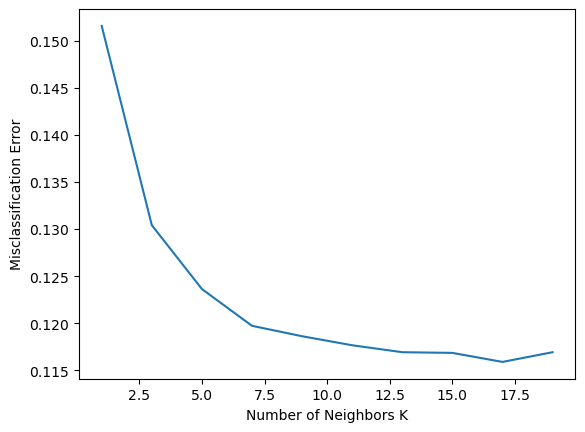

In [63]:
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

### Confussion Matrix

In [64]:
# Cetak confusion matrix
print('Confusion Matrix train set:\n', confusion_matrix(y_train, y_pred_train_knn))
print('Confusion Matrix test set:\n', confusion_matrix(y_test, y_pred_test_knn))

Confusion Matrix train set:
 [[27303   650]
 [ 2501  1193]]
Confusion Matrix test set:
 [[11581   388]
 [ 1208   387]]


**Analysis :**
* Model KNN menghasilkan akurasi yang lebih rendah pada data testing dibandingkan dengan data training. 
* Pada data training, model menghasilkan 27303 True Negative (TN), 650 False Positive (FP), 2501 False Negative (FN), dan 1193 True Positive (TP)
* Sementara pada data testing, model menghasilkan 11581 TN, 388 FP, 1208 FN, dan 387 TP.

### Accuracy Score

In [65]:
# print accuracy score
as_knn_train = metrics.accuracy_score(y_train,y_pred_train_knn)
as_knn_test = metrics.accuracy_score(y_test,y_pred_test_knn)
print('train set Accuracy: {0:.4f}'.format(as_knn_train))
print('test set Accuracy: {0:.4f}'.format(as_knn_test))

train set Accuracy: 0.9004
test set Accuracy: 0.8823


**Analysis :**
* Berdasarkan hasil yang diperoleh, nilai akurasi data training lebih besar daripada data testing. 
* Nilai akurasi sebesar 0.9004 pada data train dan 0.8823 pada data test pada model knn.
* Hal ini menunjukkan bahwa model tersebut mampu melakukan klasifikasi dengan akurasi yang cukup baik pada data train dan test.

### Classification Report

In [66]:
# print classification report
print('Train Set')
print(classification_report(y_train,y_pred_train_knn))
print('test Set')
print(classification_report(y_test,y_pred_test_knn))

Train Set
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     27953
           1       0.65      0.32      0.43      3694

    accuracy                           0.90     31647
   macro avg       0.78      0.65      0.69     31647
weighted avg       0.88      0.90      0.89     31647

test Set
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     11969
           1       0.50      0.24      0.33      1595

    accuracy                           0.88     13564
   macro avg       0.70      0.61      0.63     13564
weighted avg       0.86      0.88      0.86     13564



**Analysis :**
* Model KNN memiliki performa yang cukup baik pada data train dan test, namun masih terdapat ruang untuk perbaikan.
* Pada data train, dapat dilihat bahwa model KNN memiliki precision sebesar 0.92 dan recall sebesar 0.98 untuk kelas 0, sedangkan untuk kelas 1 memiliki precision sebesar 0.65 dan recall sebesar 0.32. Hal ini menunjukkan bahwa model KNN mampu mengklasifikasikan sebagian besar data kelas 0 dengan benar, namun memiliki kesulitan dalam mengklasifikasikan data kelas 1. F1-score pada kelas 1 juga menunjukkan nilai yang relatif rendah, yaitu sebesar 0.43.
* Sedangkan pada data test, meskipun nilai precision dan recall untuk kelas 0 masih cukup baik, namun nilai precision dan recall untuk kelas 1 relatif rendah, yaitu sebesar 0.50 dan 0.24. Hal ini menunjukkan bahwa model KNN juga masih kesulitan dalam mengklasifikasikan data kelas 1 pada data test. F1-score pada kelas 1 juga menunjukkan nilai yang relatif rendah, yaitu sebesar 0.33.
* Hasil evaluasi kinerja model KNN pada data train dan test menunjukkan bahwa model memiliki akurasi yang tinggi, tetapi terdapat perbedaan yang signifikan pada precision, recall, dan f1-score antara kelas mayoritas (0) dan kelas minoritas (1). 
* Pada data test, terjadi overfitting pada kelas minoritas (1), yang menandakan kurangnya kemampuan model dalam melakukan generalisasi pada data yang belum pernah dilihat sebelumnya.

## RANDOM FOREST

In [67]:
X

,age,balance,contact,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,day_25,day_26,day_27,day_28,day_29,day_30,day_31,poutcome_other,poutcome_success,poutcome_unknown
0,40,3036,2,261,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,26,945,2,151,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15,918,2,76,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,29,2420,2,92,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,15,917,2,198,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,1741,0,975,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
45207,53,2639,0,456,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
45208,54,5455,0,1116,4,181,3,0,0,0,...,0,0,0,0,0,0,0,0,1,0
45209,39,1584,1,508,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [68]:
y

,y
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


In [69]:
#Train the model using the training sets
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [70]:
# Use the trained Random Forest classifier to make predictions on the training data
y_pred_train_rf = rfc.predict(X_train)
y_pred_train_rf

array([0, 0, 0, ..., 1, 0, 0])

In [71]:
# Use the trained Random Forest classifier to make predictions on the testing data
y_pred_test_rf = rfc.predict(X_test)
y_pred_test_rf

array([0, 1, 0, ..., 0, 0, 0])

### Confussion Matrix

In [72]:
# Cetak confusion matrix
print('Confusion Matrix test set:\n', confusion_matrix(y_test, y_pred_test_rf))
print('Confusion Matrix train set:\n', confusion_matrix(y_train, y_pred_train_rf))

Confusion Matrix test set:
 [[11647   322]
 [ 1013   582]]
Confusion Matrix train set:
 [[27953     0]
 [    0  3694]]


**Analysis :**
* Model random forest (rf) memiliki performa yang baik pada kedua set data train dan test.
* Model Random Forest menghasilkan akurasi yang lebih rendah pada data testing dibandingkan dengan data training. 
* Pada data testing, model menghasilkan 11647 True Negative (TN), 332 False Positive (FP), 1013 False Negative (FN), dan 582 True Positive (TP)
* Sementara pada data training, model menghasilkan 27953 TN, 0 FP, 0 FN, dan 3694 TP.
* Pada data train, dapat dilihat bahwa model mampu mengklasifikasikan seluruh data dengan benar, sehingga tidak terdapat false negative maupun false positive. Hal ini menunjukkan bahwa model memiliki tingkat akurasi yang sangat tinggi pada data train.
* Sedangkan pada data test, meskipun terdapat beberapa kasus false positive dan false negative, namun secara keseluruhan model masih mampu memberikan hasil yang akurat. Hal ini menunjukkan bahwa model rf mampu melakukan generalisasi dengan baik pada data yang belum pernah dilihat sebelumnya.

### Accuracy Score

In [73]:
# Cetak accuracy score
as_rf_train = metrics.accuracy_score(y_train,y_pred_train_rf)
as_rf_test = metrics.accuracy_score(y_test,y_pred_test_rf)
print('train set Accuracy: {0:.4f}'.format(as_rf_train))
print('test set Accuracy: {0:.4f}'.format(as_rf_test))

train set Accuracy: 1.0000
test set Accuracy: 0.9016


**Analysis :**
* Pada data train, dapat dilihat bahwa model RF mampu mengklasifikasikan seluruh data dengan hampir benar, sehingga menghasilkan akurasi sebesar 1 atau 100%. Hal ini menunjukkan bahwa model RF telah mempelajari pola pada data train dengan sangat baik dan mampu mengingat data tersebut.
* Sedangkan pada data test, nilai akurasi sebesar 0,9016, namun secara keseluruhan model RF masih mampu memberikan hasil yang akurat pada data test. 
* Hal ini menunjukkan bahwa model RF mampu melakukan generalisasi data dengan baik

### Classification Report

In [74]:
# Cetak classification report
print('train set \n', classification_report(y_train,y_pred_train_rf))
print('test set \n', classification_report(y_test,y_pred_test_rf))

train set 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     27953
           1       1.00      1.00      1.00      3694

    accuracy                           1.00     31647
   macro avg       1.00      1.00      1.00     31647
weighted avg       1.00      1.00      1.00     31647

test set 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     11969
           1       0.64      0.36      0.47      1595

    accuracy                           0.90     13564
   macro avg       0.78      0.67      0.71     13564
weighted avg       0.89      0.90      0.89     13564



**Analysis :**
* Model random forest (RF) memiliki performa yang sangat baik pada data train, namun performa pada data test lebih rendah.
* Pada data train, dapat dilihat bahwa model RF memiliki nilai precision, recall, dan f1-score sebesar 1.0 pada seluruh kelas, serta memiliki nilai akurasi sebesar 1.0. Hal ini menunjukkan bahwa model RF mampu mengklasifikasikan seluruh data pada data train dengan sangat baik.
* Namun, pada data train, meskipun model RF masih memiliki nilai akurasi yang tinggi sebesar 0.903, namun nilai precision, recall, dan f1-score pada kelas minoritas (kelas 1) relatif lebih rendah dibandingkan dengan kelas mayoritas (kelas 0). Hal ini menunjukkan bahwa model RF mungkin mengalami kesulitan dalam membedakan antara data kelas minoritas dan mayoritas pada data test.
* Sedangkan pada data test, meskipun nilai precision dan recall untuk kelas 0 masih cukup baik, namun nilai precision dan recall untuk kelas 1 relatif rendah, yaitu sebesar 0.64 dan 0.36. Hal ini menunjukkan bahwa model SVM juga masih kesulitan dalam mengklasifikasikan data kelas 1 pada data test. F1-score pada kelas 1 juga menunjukkan nilai yang relatif rendah, yaitu sebesar 0.47.
* Hasil evaluasi kinerja model random forest pada data train dan test menunjukkan bahwa model memiliki akurasi yang tinggi, Hal ini menunjukkan bahwa model RF mampu mengklasifikasikan seluruh data pada data train dengan sangat baik.
* Pada data test, terjadi overfitting pada kelas minoritas (1), yang menandakan kurangnya kemampuan model dalam melakukan generalisasi pada data yang belum pernah dilihat sebelumnya. 

## DECISION TREE

In [75]:
X

,age,balance,contact,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,day_25,day_26,day_27,day_28,day_29,day_30,day_31,poutcome_other,poutcome_success,poutcome_unknown
0,40,3036,2,261,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,26,945,2,151,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15,918,2,76,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,29,2420,2,92,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,15,917,2,198,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,1741,0,975,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
45207,53,2639,0,456,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
45208,54,5455,0,1116,4,181,3,0,0,0,...,0,0,0,0,0,0,0,0,1,0
45209,39,1584,1,508,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [76]:
y

,y
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


In [77]:
# Split dataset into training set [70%] and test set [30%]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [78]:
# Build Model
dtc = DecisionTreeClassifier(max_depth=3)

#Train the model using the training sets
dtc.fit(X_train,y_train)

#Predict the response for train dataset
y_pred_train_dt = dtc.predict(X_train)
y_pred_train_dt

array([0, 0, 0, ..., 0, 0, 0])

In [79]:
#Predict the response for test dataset
y_pred_test_dt = dtc.predict(X_test)
y_pred_test_dt

array([0, 1, 0, ..., 0, 0, 0])

### Confussion Matrix

In [80]:
# Cetak confusion matrix
print('Confusion Matrix train set :\n', confusion_matrix(y_train, y_pred_train_dt))
print('Confusion Matrix test set :\n', confusion_matrix(y_test, y_pred_test_dt))

Confusion Matrix train set :
 [[27236   717]
 [ 2360  1334]]
Confusion Matrix test set :
 [[11631   338]
 [ 1052   543]]


**Analysis :**
* Model DT menghasilkan akurasi yang lebih rendah pada data testing dibandingkan dengan data training. 
* Pada data training, model menghasilkan 27236 True Negative (TN), 717 False Positive (FP), 2360 False Negative (FN), dan 1334 True Positive (TP)
* Sementara pada data testing, model menghasilkan 11631 TN, 338 FP, 1052 FN, dan 543 TP.

### Accuracy Score

In [81]:
# Cetak accuracy score
as_dt_train = metrics.accuracy_score(y_train,y_pred_train_dt)
as_dt_test = metrics.accuracy_score(y_test,y_pred_test_dt)
print('train set Accuracy: {0:.4f}'.format(as_dt_train))
print('test set Accuracy: {0:.4f}'.format(as_dt_test))

train set Accuracy: 0.9028
test set Accuracy: 0.8975


**Analysis :**
* Berdasarkan hasil yang diperoleh, nilai akurasi data training lebih besar daripada data testing. 
* Nilai akurasi sebesar 0.9028 pada data train dan 0.8975 pada data test pada model DT.
* Hal ini menunjukkan bahwa model tersebut mampu melakukan klasifikasi dengan akurasi yang cukup baik pada data train dan test.

### Classification Report

In [82]:
# Cetak classification report
print('train set \n', classification_report(y_train,y_pred_train_dt))
print('test set \n', classification_report(y_test,y_pred_test_dt))

train set 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     27953
           1       0.65      0.36      0.46      3694

    accuracy                           0.90     31647
   macro avg       0.79      0.67      0.71     31647
weighted avg       0.89      0.90      0.89     31647

test set 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94     11969
           1       0.62      0.34      0.44      1595

    accuracy                           0.90     13564
   macro avg       0.77      0.66      0.69     13564
weighted avg       0.88      0.90      0.88     13564



**Analysis :**
* Model DT memiliki performa yang cukup baik pada data train dan test, namun masih terdapat ruang untuk perbaikan.
* Pada data train, dapat dilihat bahwa model DT memiliki precision sebesar 0.92 dan recall sebesar 0.97 untuk kelas 0, sedangkan untuk kelas 1 memiliki precision sebesar 0.65 dan recall sebesar 0.36. Hal ini menunjukkan bahwa model DT mampu mengklasifikasikan sebagian besar data kelas 0 dengan benar, namun memiliki kesulitan dalam mengklasifikasikan data kelas 1. F1-score pada kelas 1 juga menunjukkan nilai yang relatif rendah, yaitu sebesar 0.46.
* Sedangkan pada data test, meskipun nilai precision dan recall untuk kelas 0 masih cukup baik, namun nilai precision dan recall untuk kelas 1 relatif rendah, yaitu sebesar 0.62 dan 0.34. Hal ini menunjukkan bahwa model DT juga masih kesulitan dalam mengklasifikasikan data kelas 1 pada data test. F1-score pada kelas 1 juga menunjukkan nilai yang relatif rendah, yaitu sebesar 0.44.
* Hasil evaluasi kinerja model decission tree pada data train dan test menunjukkan bahwa model memiliki akurasi yang tinggi, tetapi terdapat perbedaan yang signifikan pada precision, recall, dan f1-score antara kelas mayoritas (0) dan kelas minoritas (1). 
* Pada data test, terjadi overfitting pada kelas minoritas (1), yang menandakan kurangnya kemampuan model dalam melakukan generalisasi pada data yang belum pernah dilihat sebelumnya.

### Visualisasi Decision Tree

In [83]:
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.datasets import load_iris
import pydotplus 
from six import StringIO
from IPython.display import Image

In [84]:
X

,age,balance,contact,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,day_25,day_26,day_27,day_28,day_29,day_30,day_31,poutcome_other,poutcome_success,poutcome_unknown
0,40,3036,2,261,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,26,945,2,151,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15,918,2,76,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,29,2420,2,92,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,15,917,2,198,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,1741,0,975,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
45207,53,2639,0,456,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
45208,54,5455,0,1116,4,181,3,0,0,0,...,0,0,0,0,0,0,0,0,1,0
45209,39,1584,1,508,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [85]:
y

,y
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


In [86]:
# Split dataset into training set [70%] and test set [30%]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

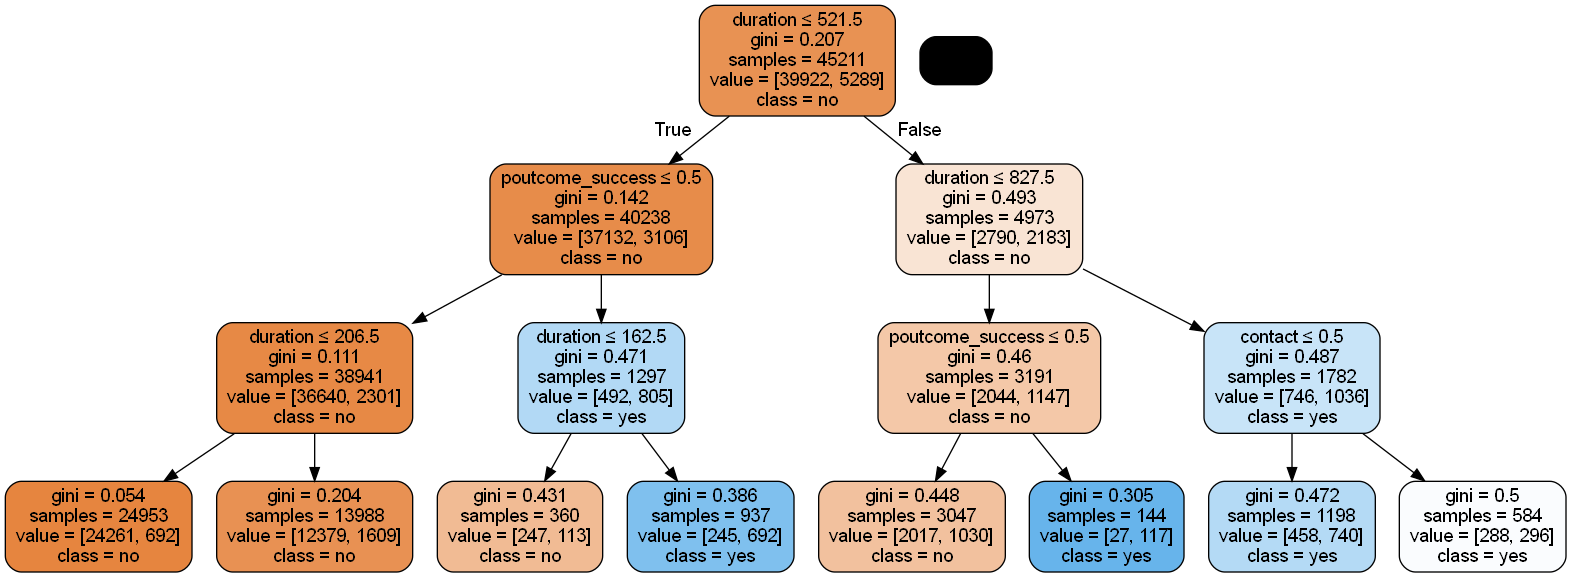

In [87]:
dtree = DecisionTreeClassifier(max_depth=3)
dtree.fit(X, y)

dot_data = export_graphviz(dtree, out_file=None, 
                           feature_names=X.columns.values,  
                           class_names=['no', 'yes'],  
                           filled=True, rounded=True,  
                           special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

**Analysis :**
* Pada level pertama, data dipisahkan berdasarkan fitur "duration" dengan nilai cutoff 521,5.
* Gini coefficient pada node ini adalah 0,207, menunjukkan bahwa pemisahan data pada node ini cukup baik.
* Terdapat dua cabang pada node ini, yaitu "true" dan "false".
* Pada cabang "true", data dipisahkan kembali berdasarkan fitur "poutcome_success" dengan nilai cutoff 0,5. Gini coefficient pada node ini adalah 0,142, menunjukkan bahwa pemisahan data pada cabang ini cukup baik. Mayoritas data pada cabang ini termasuk ke dalam kelas "no".
* Pada cabang "false", data dipisahkan kembali berdasarkan fitur "duration" dengan nilai cutoff 827,5. Gini coefficient pada node ini adalah 0,493, menunjukkan bahwa pemisahan data pada cabang ini kurang baik. Mayoritas data pada cabang ini juga termasuk ke dalam kelas "no", namun jumlah data pada kelas "yes" lebih besar dibandingkan dengan cabang "true".

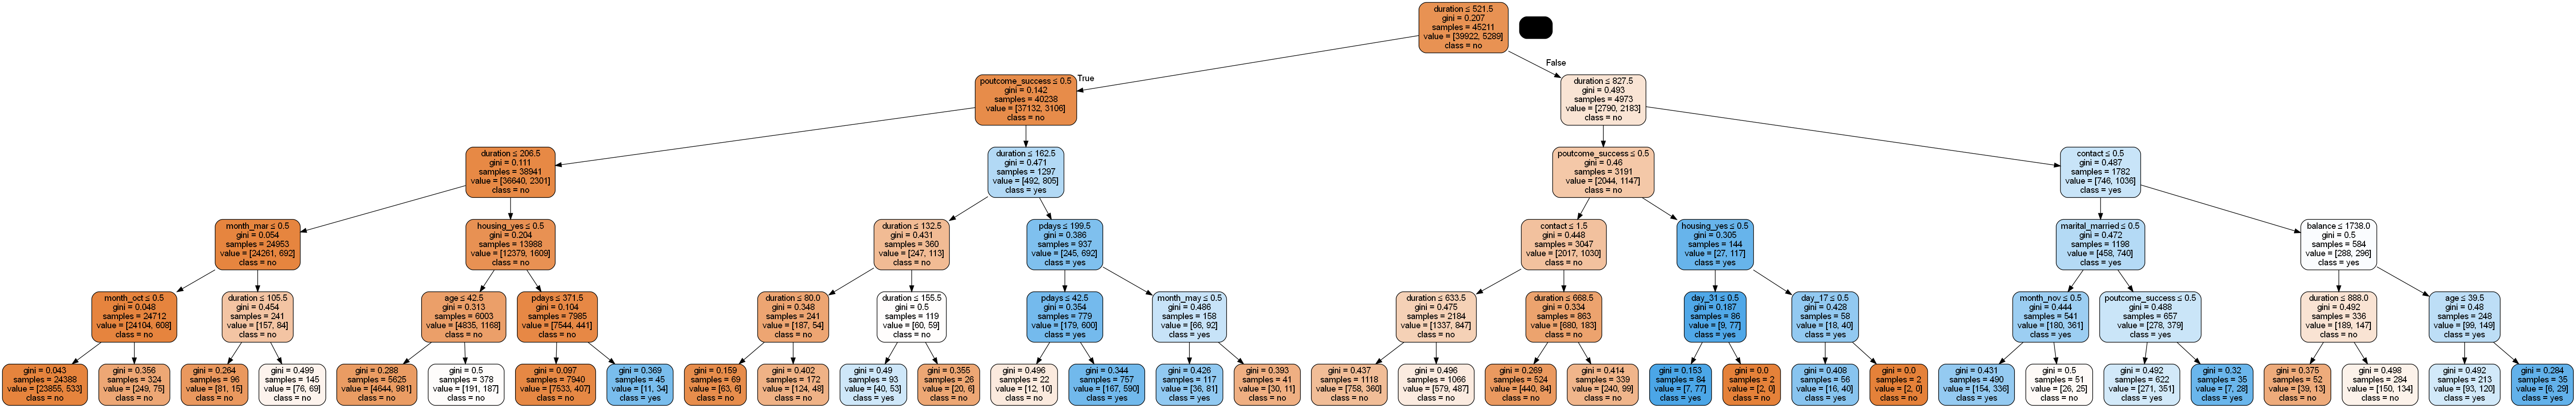

In [88]:
dtree = DecisionTreeClassifier(max_depth=5)
dtree.fit(X, y)

dot_data = export_graphviz(dtree, out_file=None, 
                           feature_names=X.columns.values,  
                           class_names=['no', 'yes'],  
                           filled=True, rounded=True,  
                           special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

## SUPPORT VECTOR MACHINE (SVM)

In [89]:
X

,age,balance,contact,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,day_25,day_26,day_27,day_28,day_29,day_30,day_31,poutcome_other,poutcome_success,poutcome_unknown
0,40,3036,2,261,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,26,945,2,151,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15,918,2,76,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,29,2420,2,92,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,15,917,2,198,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,1741,0,975,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
45207,53,2639,0,456,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
45208,54,5455,0,1116,4,181,3,0,0,0,...,0,0,0,0,0,0,0,0,1,0
45209,39,1584,1,508,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [90]:
y

,y
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


In [91]:
# Split dataset into training set [70%] and test set [30%]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [92]:
# Build Model
svc_model = SVC()

#Train the model using the training sets
svc_model.fit(X_train,y_train)

SVC()

In [93]:
#Predict the response for train dataset
y_pred_train_svm = svc_model.predict(X_train)
y_pred_train_svm

array([0, 0, 0, ..., 0, 0, 0])

In [94]:
#Predict the response for test dataset
y_pred_test_svm = svc_model.predict(X_test)
y_pred_test_svm

array([0, 0, 0, ..., 0, 0, 0])

### Confussion Matrix

In [95]:
# Cetak confusion matrix
print('Confusion Matrix test set:\n', confusion_matrix(y_test, y_pred_test_svm))
print('Confusion Matrix train set:\n', confusion_matrix(y_train, y_pred_train_svm))

Confusion Matrix test set:
 [[11889    80]
 [ 1497    98]]
Confusion Matrix train set:
 [[27803   150]
 [ 3441   253]]


**Analysis :**
* Model SVM menghasilkan akurasi yang lebih rendah pada data testing dibandingkan dengan data training. 
* Pada data testing, model menghasilkan 11889 True Negative (TN), 80 False Positive (FP), 1497 False Negative (FN), dan 98 True Positive (TP)
* Sementara pada data training, model menghasilkan 27803 TN, 150 FP, 3441 FN, dan 253 TP.

### Accuracy Score

In [96]:
# Cetak accuracy score
as_svm_train = metrics.accuracy_score(y_train,y_pred_train_svm)
as_svm_test = metrics.accuracy_score(y_test,y_pred_test_svm)
print('train set Accuracy: {0:.4f}'.format(as_svm_train))
print('test set Accuracy: {0:.4f}'.format(as_svm_test))

train set Accuracy: 0.8865
test set Accuracy: 0.8837


**Analysis :**
* Berdasarkan hasil yang diperoleh, nilai akurasi data training lebih besar daripada data testing. 
* Nilai akurasi sebesar 0.8865 pada data train dan 0.8837 pada data test pada model svm.
* Hal ini menunjukkan bahwa model tersebut mampu melakukan klasifikasi dengan akurasi yang cukup baik pada data train dan test.

### Classification Report

In [97]:
# Cetak classification report
print('train set \n', classification_report(y_train,y_pred_train_svm))
print('test set \n', classification_report(y_test,y_pred_test_svm))

train set 
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     27953
           1       0.63      0.07      0.12      3694

    accuracy                           0.89     31647
   macro avg       0.76      0.53      0.53     31647
weighted avg       0.86      0.89      0.84     31647

test set 
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     11969
           1       0.55      0.06      0.11      1595

    accuracy                           0.88     13564
   macro avg       0.72      0.53      0.52     13564
weighted avg       0.85      0.88      0.84     13564



**Analysis :**
* Model SVM memiliki performa yang cukup baik pada data train dan test, namun masih terdapat ruang untuk perbaikan.
* Pada data train, dapat dilihat bahwa model SVM memiliki precision sebesar 0.89 dan recall sebesar 0.99 untuk kelas 0, sedangkan untuk kelas 1 memiliki precision sebesar 0.63 dan recall sebesar 0.07. Hal ini menunjukkan bahwa model SVM mampu mengklasifikasikan sebagian besar data kelas 0 dengan benar, namun memiliki kesulitan dalam mengklasifikasikan data kelas 1. F1-score pada kelas 1 juga menunjukkan nilai yang relatif rendah, yaitu sebesar 0.12.
* Sedangkan pada data test, meskipun nilai precision dan recall untuk kelas 0 masih cukup baik, namun nilai precision dan recall untuk kelas 1 relatif rendah, yaitu sebesar 0.55 dan 0.06. Hal ini menunjukkan bahwa model SVM juga masih kesulitan dalam mengklasifikasikan data kelas 1 pada data test. F1-score pada kelas 1 juga menunjukkan nilai yang relatif rendah, yaitu sebesar 0.11.
* Hasil evaluasi kinerja model logistic regression pada data train dan test menunjukkan bahwa model memiliki akurasi yang tinggi, tetapi terdapat perbedaan yang signifikan pada precision, recall, dan f1-score antara kelas mayoritas (0) dan kelas minoritas (1). 
* Pada data test, terjadi overfitting pada kelas minoritas (1), yang menandakan kurangnya kemampuan model dalam melakukan generalisasi pada data yang belum pernah dilihat sebelumnya. 

# ALGORITHM ANALYSIS
PILIH 1, MENGAPA MEMILIH ALGORITMA TERSEBUT

## Comparing and Evaluating Model Performances

In [98]:
df

,age,balance,contact,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,day_25,day_26,day_27,day_28,day_29,day_30,day_31,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,unknown,261,1,-1,0,no,0,0,...,0,0,0,0,0,0,0,0,0,1
1,44,29,unknown,151,1,-1,0,no,0,0,...,0,0,0,0,0,0,0,0,0,1
2,33,2,unknown,76,1,-1,0,no,0,1,...,0,0,0,0,0,0,0,0,0,1
3,47,1506,unknown,92,1,-1,0,no,1,0,...,0,0,0,0,0,0,0,0,0,1
4,33,1,unknown,198,1,-1,0,no,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,cellular,977,3,-1,0,yes,0,0,...,0,0,0,0,0,0,0,0,0,1
45207,71,1729,cellular,456,2,-1,0,yes,0,0,...,0,0,0,0,0,0,0,0,0,1
45208,72,5715,cellular,1127,5,184,3,yes,0,0,...,0,0,0,0,0,0,0,0,1,0
45209,57,668,telephone,508,4,-1,0,no,1,0,...,0,0,0,0,0,0,0,0,0,1


In [99]:
X

,age,balance,contact,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,day_25,day_26,day_27,day_28,day_29,day_30,day_31,poutcome_other,poutcome_success,poutcome_unknown
0,40,3036,2,261,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,26,945,2,151,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15,918,2,76,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,29,2420,2,92,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,15,917,2,198,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,1741,0,975,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
45207,53,2639,0,456,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
45208,54,5455,0,1116,4,181,3,0,0,0,...,0,0,0,0,0,0,0,0,1,0
45209,39,1584,1,508,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [100]:
y

,y
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


In [101]:
# Split dataset into training set [70%] and test set [30%]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [102]:
# accuracy score the model
print('Accuracy score')
print('Logistic Regression', as_lr_test)
print('Decision Tree', as_dt_test)
print('Random Forest', as_rf_test)
print('SVM', as_svm_test)
print('Naive Bayes', as_nb_test)
print('KNN', as_knn_test)

Accuracy score
Logistic Regression 0.8897080507225007
Decision Tree 0.8975228546151578
Random Forest 0.9015777056915364
SVM 0.8837363609554704
Naive Bayes 0.8368475375995281
KNN 0.8823355942199941


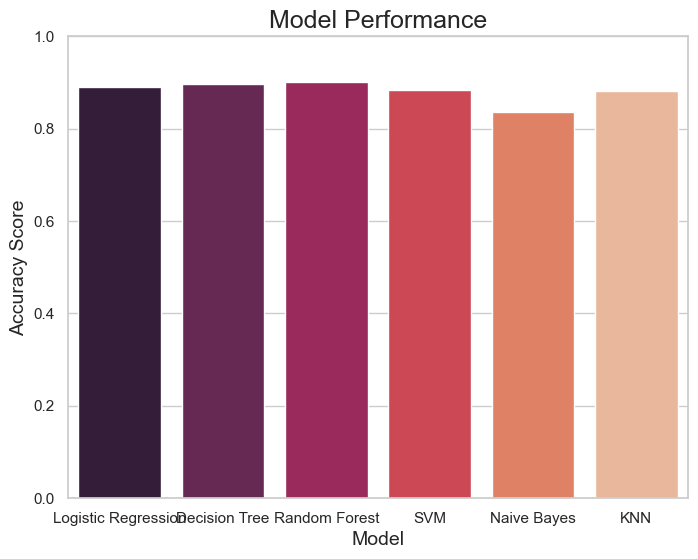

In [103]:
# List of model names and their corresponding accuracy scores
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Naive Bayes', 'KNN']
accuracy_scores = [as_lr_test, as_dt_test, as_rf_test, as_svm_test, as_nb_test, as_knn_test]

# Mengatur tampilan plot dengan seaborn
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))

# Plot histogram of accuracy scores
ax = sns.barplot(x=model_names, y=accuracy_scores, palette='rocket')
plt.ylim(0, 1)
plt.title('Model Performance', fontsize=18)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14)

plt.show()

In [104]:
# buat array dengan nilai akurasi tiap model
accuracies = np.array([as_lr_test, as_dt_test, as_rf_test, as_svm_test, as_nb_test, as_knn_test])

# cari index dengan nilai akurasi tertinggi
max_index = np.argmax(accuracies)

# buat array dengan nama model
models = np.array(['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Naive Bayes', 'KNN'])

# cetak nama model dengan akurasi tertinggi dan nilai akurasinya
print("Model dengan akurasi tertinggi adalah", models[max_index], "dengan nilai akurasi sebesar", accuracies[max_index])

Model dengan akurasi tertinggi adalah Random Forest dengan nilai akurasi sebesar 0.9015777056915364


# Save Model
Making Predictions with the Trained Model

In [105]:
import pickle

rfc

RandomForestClassifier()

In [106]:
# Saving the model
filename = 'rfc-asg3.pkl'
pickle.dump(rfc, open(filename, 'wb'))

In [107]:
#read model
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model

RandomForestClassifier()

In [108]:
# Melakukan Prediksi pada 50 Baris Pertama dari Data Uji Menggunakan Model yang Telah di-Load Sebelumnya
result = loaded_model.predict(X_test)
result[:50]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [109]:
# Mengambil kolom 'y' dari DataFrame bank sebagai variabel target
real_full=bank['y']

# Mengambil 1000 nilai pertama dari variabel target sebagai variabel real
real=real_full[:1000]
real

0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: y, Length: 1000, dtype: int32

In [110]:
real.value_counts()

0    981
1     19
Name: y, dtype: int64

In [111]:
# Melakukan prediksi dengan model Random Forest pada data uji
pred = rfc.predict(X_test)

# Membuat DataFrame df3 untuk membandingkan nilai sebenarnya dan prediksi pada 1000 baris pertama
df3=pd.DataFrame({'real': real, 'prediction':pred[:1000]})

# Menampilkan DataFrame df3
df3

,real,prediction
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
995,0,0
996,0,0
997,0,0
998,0,0


In [112]:
# Real x Prediction for the first 1000 lines
df3.head()

,real,prediction
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0


In [113]:
# How many of the predictions are the same or different from the real ones in the first 1000 lines
print("Number of same predictions:", df3[df3['real'] == df3['prediction']].value_counts())
print("Number of different predictions:", df3[df3['real'] != df3['prediction']].value_counts())

Number of same predictions: real  prediction
0     0             931
1     1               1
dtype: int64
Number of different predictions: real  prediction
0     1             50
1     0             18
dtype: int64


# CONCLUSION

* Kedua kategori tersebut tidak seimbang, dimana nilai positif yaitu kategori yes/subscribed hanya sebesar 11,70% dari semua target
* Dari data tersebut 3 Job teratas adalah blue-collars, management, and technicians, umur klien yang paling banyak ada disekitar 35-40 tahun dan sarana komunikasi yang umum digunakan adalah seluler.
* Nilai korelasi antara dua variabel yang sama adalah 1 atau sempurna.
* Dari semua model yang telah diuji, Random Forest memiliki nilai akurasi tertinggi sekitar 90,16%. Hal ini berarti Random Forest memiliki performa yang lebih baik daripada model lain
* Pada confussion matrix data train, dapat dilihat bahwa model mampu mengklasifikasikan seluruh data dengan benar, sehingga tidak terdapat false negative maupun false positive. Hal ini menunjukkan bahwa model memiliki tingkat akurasi yang sangat tinggi pada data train.
* Dilihat dari classification report pada data train, dapat dilihat bahwa model RF mampu mengklasifikasikan seluruh data dengan hampir benar, sehingga menghasilkan akurasi sebesar 1 atau 100%. Hal ini menunjukkan bahwa model RF telah mempelajari pola pada data train dengan sangat baik dan mampu mengingat data tersebut.
* Ini akan menjadi model yang digunakan untuk memprediksi apakah nasabah dapat menandatangani term deposit atau tidak. Model akan disimpan dan siap untuk membuat prediksi.

In [ ]:
# Nadia Syachrani - PYTN-KS11-020